### Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD ,Adam
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.utils import np_utils
import pickle
import tensorflow as tf
np.random.seed(1671) # for reproducibility

### Data set preparation
Data set used in this notebook is provided in this website
https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed

In [165]:
with open('DATASET/data8.pickle', 'rb') as f:
        d = pickle.load(f, encoding='latin1') # dictionary type, we use 'latin1' for python3
        # At the same time method 'astype()' used for converting ndarray from int to float
        # It is needed to divide float by float when applying Normalization
        x_train = d['x_train'].astype(np.float32)   # 4D numpy.ndarray type, for train = (34799, 32, 32, 3)
        y_train = d['y_train']                        # 1D numpy.ndarray type, for train = (34799,)
        x_valid = d['x_validation'].astype(np.float32)                         # 2D numpy.ndarray type, for train = (34799, 2)
        y_valid = d['y_validation']                        # 2D numpy.ndarray type, for train = (34799, 4)
        x_test = d['x_test'].astype(np.float32)
        y_test = d['y_test']
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)
y_valid = np_utils.to_categorical(y_valid, NB_CLASSES)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(x_test.shape)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 32, 32, 1)
NB_FEATURES = x_train.shape[1:]
NB_FEATURES

(86989, 1, 32, 32)
(86989, 43)
(4410, 1, 32, 32)
(12630, 1, 32, 32)


(32, 32, 1)

### Configuring the network && the training + validation (phase)

In [166]:

NB_CLASSES= 43
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding = 'valid',input_shape=(NB_FEATURES), data_format='channels_last'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.75))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', padding = 'valid'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(NB_CLASSES, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=128, epochs=100,verbose=1,validation_data=(x_valid,y_valid))

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 1, 1, 128)         204928    
_________________________________________________________________
flatten_37 (Flatten)         (None, 128)             

Epoch 45/100
680/680 [==============================] - 56s 82ms/step - loss: 0.1246 - accuracy: 0.9632 - val_loss: 0.0565 - val_accuracy: 0.9839
Epoch 46/100
680/680 [==============================] - 55s 81ms/step - loss: 0.1203 - accuracy: 0.9645 - val_loss: 0.0644 - val_accuracy: 0.9828
Epoch 47/100
680/680 [==============================] - 56s 82ms/step - loss: 0.1184 - accuracy: 0.9654 - val_loss: 0.0665 - val_accuracy: 0.9814
Epoch 48/100
680/680 [==============================] - 55s 82ms/step - loss: 0.1234 - accuracy: 0.9640 - val_loss: 0.0625 - val_accuracy: 0.9830
Epoch 49/100
680/680 [==============================] - 56s 82ms/step - loss: 0.1177 - accuracy: 0.9654 - val_loss: 0.0728 - val_accuracy: 0.9791
Epoch 50/100
680/680 [==============================] - 56s 82ms/step - loss: 0.1229 - accuracy: 0.9641 - val_loss: 0.0558 - val_accuracy: 0.9853
Epoch 51/100
680/680 [==============================] - 56s 82ms/step - loss: 0.1179 - accuracy: 0.9658 - val_loss: 0.0554 -

### The test phase

In [167]:
score_2 = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", score_2[0])
print('Test accuracy:', score_2[1])

395/395 [==============================] - 3s 6ms/step - loss: 0.1204 - accuracy: 0.9663
Test score: 0.12037160992622375
Test accuracy: 0.9663499593734741


### the learning+validation curves

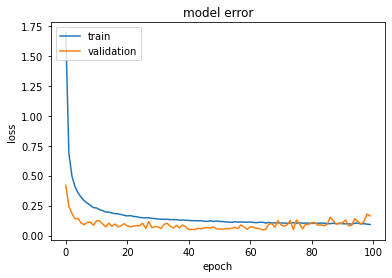

In [168]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()